## Task 1: Data Exploration

# 1a) Load and inspect the dataset.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv("../DataSets/LP_Train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [185]:
df.shape

(614, 13)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [189]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [191]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 1b) Perform initial descriptive statistics on numerical columns 

In [194]:
num_col = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
df[num_col].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 1c) Analyze the distribution of categorical columns 

In [197]:
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


for column in cat_columns:
    a= df[column].value_counts()
    print(a)

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


## 1d) Visualize and identify missing values in the dataset.

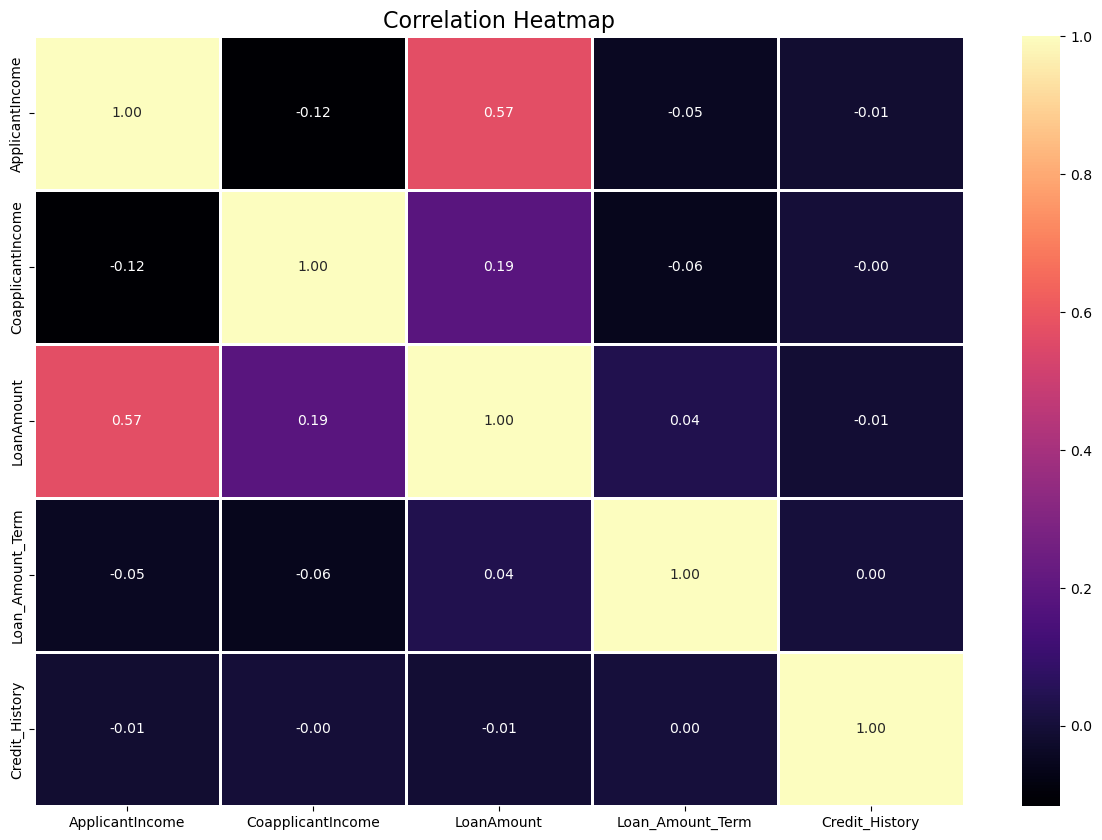

In [200]:
a = df.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(data=a, annot=True, fmt=".2f", cmap="magma", linewidths=0.9)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [201]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Task 2: Handling Missing Data

In [205]:
## numeric_columns
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())


In [207]:

## Categorical columns
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


In [209]:
## replacing numeric(float) values to categorical values
df["Credit_History"] = df["Credit_History"].replace({1.0:"yes",0.0:"no"})
df["Credit_History"]=df["Credit_History"].fillna("unknown")

In [211]:
# converting float values to int type
df["CoapplicantIncome"] = df["CoapplicantIncome"].astype("int64")
df["LoanAmount"] = df["LoanAmount"].astype("int64")
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype("int64")

In [213]:
df["Loan_Approval"] = df["Loan_Status"].replace({"Y": "Approved", "N": "Not Approved"})


In [ ]:
df

In [ ]:
df.dtypes

##  Task 3:Demographic Analysis

## 3a) Explore the relationship between loan approval and gender using bar plots.

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_16212\787998131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.Gender, y=df.Loan_Approval,palette="magma")


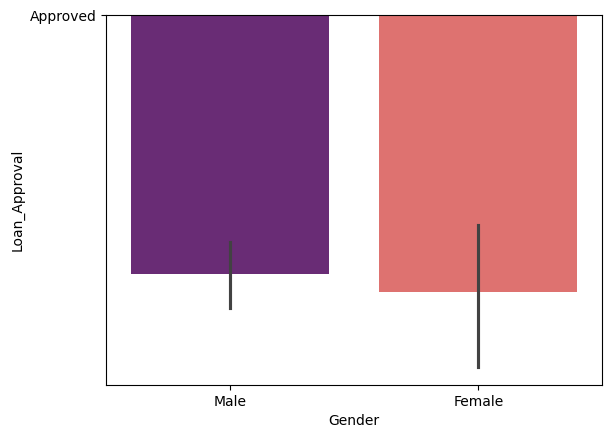

In [322]:
sns.barplot(x=df.Gender, y=df.Loan_Approval,palette="magma")
plt.show()


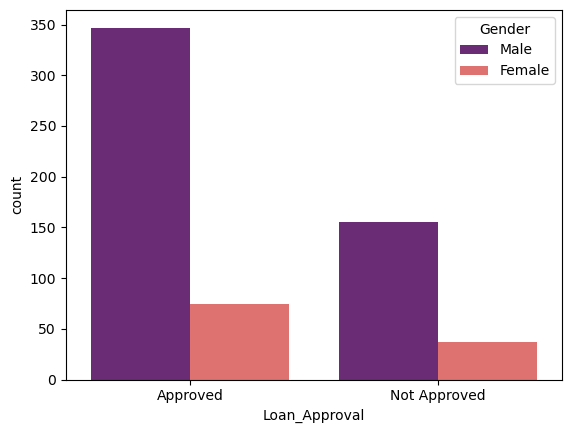

In [324]:
sns.countplot(x=df.Loan_Approval,hue=df.Gender,palette="magma")
plt.show()

## 3b) Analyze how marital status affects loan approval rates

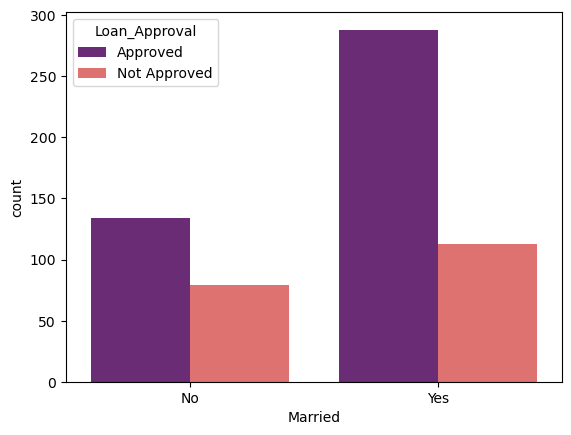

In [327]:
sns.countplot(x=df.Married,hue = df.Loan_Approval,palette="magma")
plt.show()

## Examine the influence of the number of dependents on loan approval.

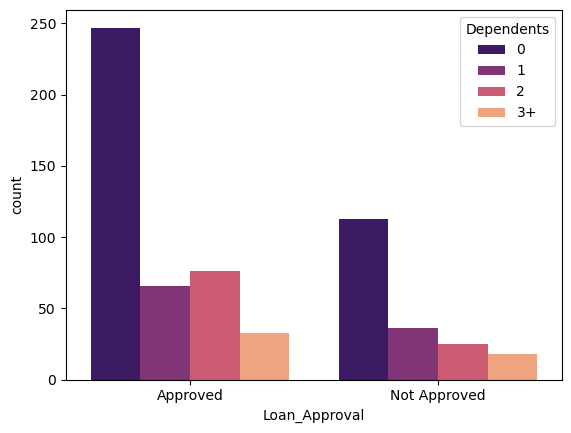

In [330]:
sns.countplot(x = df.Loan_Approval,hue = df.Dependents,palette="magma")
plt.show()

## 3c) Investigate loan approval by education background

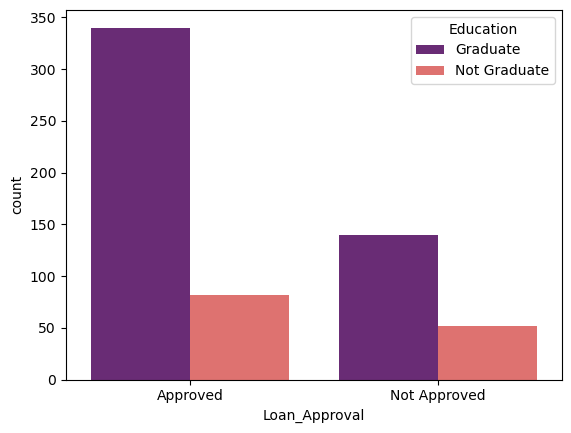

In [333]:
sns.countplot(x = df.Loan_Approval,hue = df.Education,palette="magma")
plt.show()

## 3d) Assess the impact of self-employment status on loan approval.

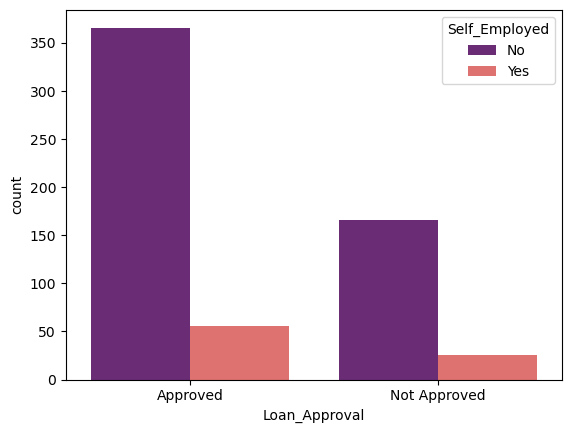

In [336]:
sns.countplot(x = df.Loan_Approval,hue = df.Self_Employed,palette="magma")
plt.show()

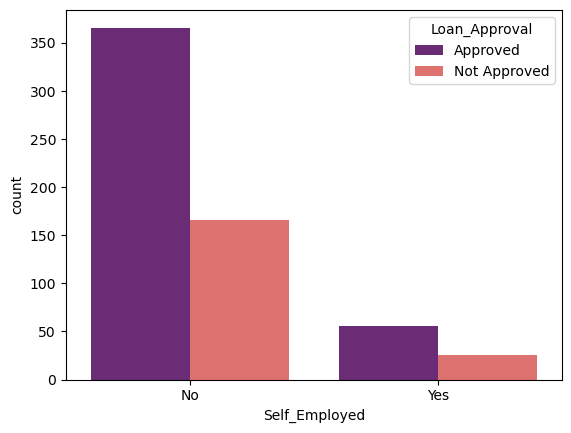

In [337]:
sns.countplot(x = df.Self_Employed,hue = df.Loan_Approval,palette="magma")
plt.show()

### Task 4: Income and Loan Amount Analysis

## 4a) Visualize the relationship between applicant income and loan approval using boxplots.

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_16212\1636497519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.Loan_Approval, y = df.ApplicantIncome,palette="magma")


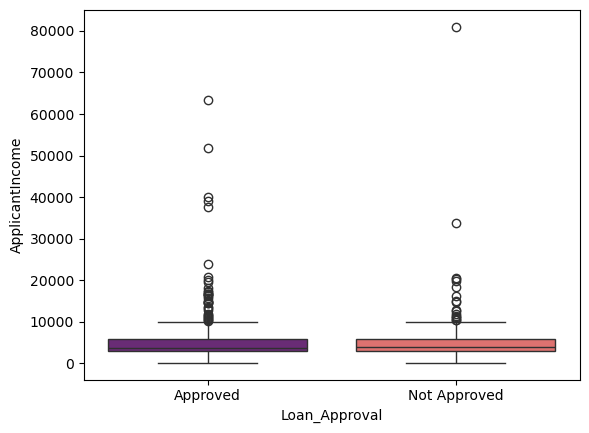

In [342]:
sns.boxplot(x=df.Loan_Approval, y = df.ApplicantIncome,palette="magma")
plt.show()

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_16212\631439074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[i], palette="magma")


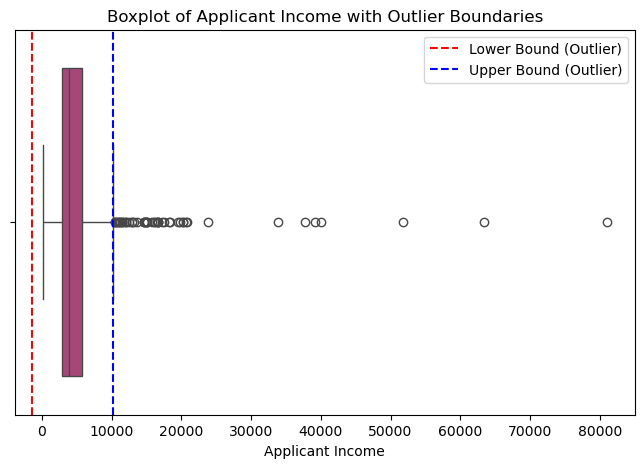

In [348]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[i], palette="magma")

# Plot the outlier boundaries as vertical dashed lines
plt.axvline(c1, color='red', linestyle='dashed', label="Lower Bound (Outlier)")
plt.axvline(c2, color='blue', linestyle='dashed', label="Upper Bound (Outlier)")

# Labels
plt.title("Boxplot of Applicant Income with Outlier Boundaries")
plt.xlabel("Applicant Income")
plt.legend()
plt.show()

## 4b) Examine how co-applicant income influences loan approval.

In [351]:
df.groupby("Loan_Approval")["CoapplicantIncome"].agg(["mean", "median","sum"])


,mean,median,sum
Loan_Approval,,,
Approved,1504.514218,1239.5,634905
Not Approved,1877.807292,268.0,360539


C:\Users\RAHUL\AppData\Local\Temp\ipykernel_16212\3308573511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Loan_Approval"], y =df["CoapplicantIncome"], palette="magma")


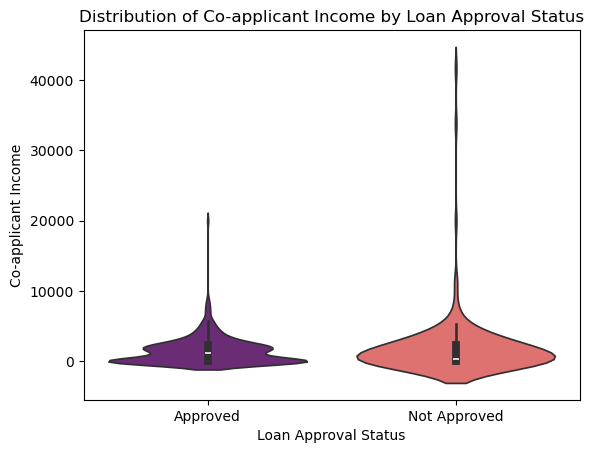

In [353]:

sns.violinplot(x=df["Loan_Approval"], y =df["CoapplicantIncome"], palette="magma")

plt.title("Distribution of Co-applicant Income by Loan Approval Status")
plt.xlabel("Loan Approval Status")
plt.ylabel("Co-applicant Income")
plt.show()


## Perform correlation analysis between applicant income, co-applicant income,and loan amount.

In [356]:
#The correlation coefficient tells us the relationship between variables:

#+1 → Strong positive correlation (both increase together)
#0 → No correlation
#-1 → Strong negative correlation (one increases, the other decreases)

In [358]:
corr_matric = df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].corr()
corr_matric

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116604,0.565181
CoapplicantIncome,-0.116604,1.000000,0.189218
LoanAmount,0.565181,0.189218,1.000000


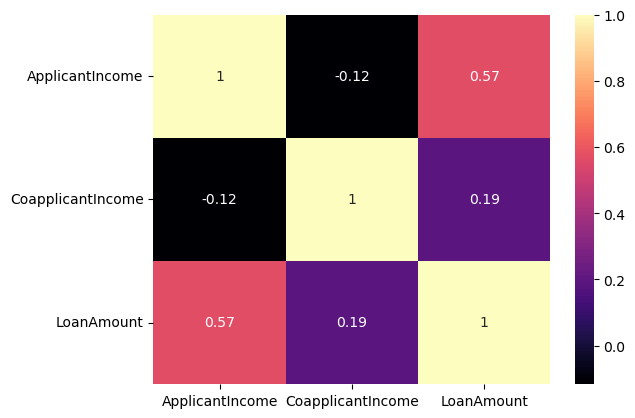

In [360]:
sns.heatmap(corr_matric,annot = True,cmap="magma")
plt.show()

## Compare loan amounts requested by different demographic groups (gender,marital status, education).

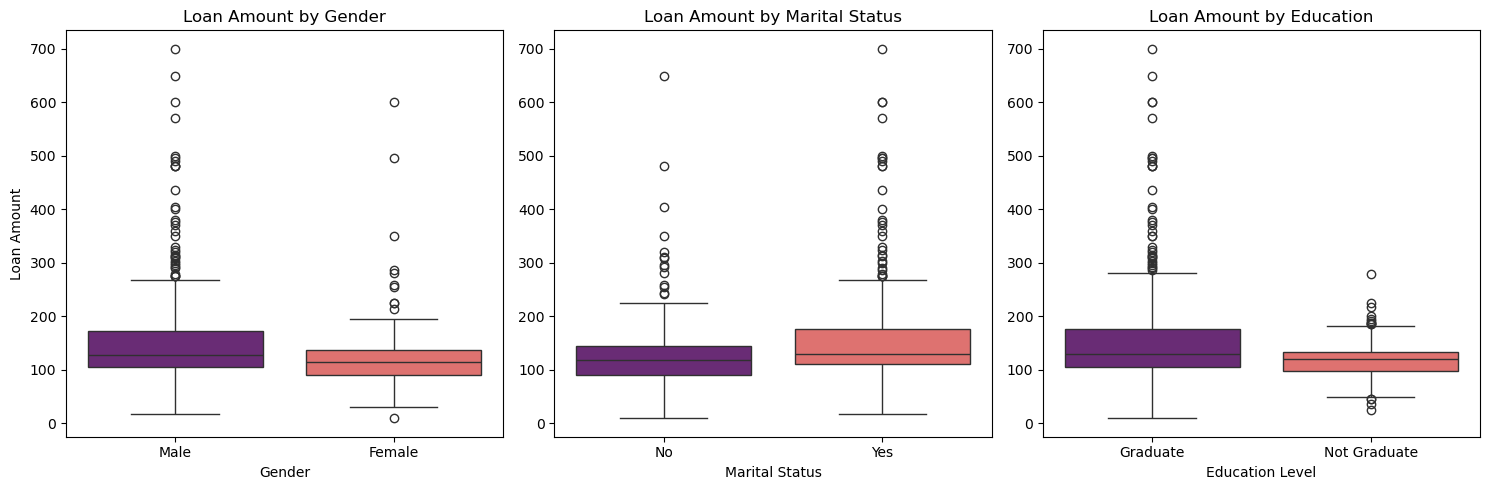

In [363]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Loan Amount by Gender
sns.boxplot(x=df.Gender, y=df.LoanAmount,hue = df.Gender, palette="magma", ax=axes[0])
axes[0].set_title("Loan Amount by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Loan Amount")

# Plot 2: Loan Amount by Marital Status
sns.boxplot(x=df.Married, y=df.LoanAmount,hue = df.Married, palette="magma", ax=axes[1])
axes[1].set_title("Loan Amount by Marital Status")
axes[1].set_xlabel("Marital Status")
axes[1].set_ylabel("")

# Plot 3: Loan Amount by Education
sns.boxplot(x=df.Education, y=df.LoanAmount,hue = df.Education, palette="magma", ax=axes[2])
axes[2].set_title("Loan Amount by Education")
axes[2].set_xlabel("Education Level")
axes[2].set_ylabel("")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Task 5: Credit History and Loan Term Analysis

## Examine the loan approval rate for applicants with different credit histories

In [366]:
import pandas as pd

approval_table = pd.crosstab(df["Credit_History"], df["Loan_Approval"], normalize="index") * 100
print(approval_table)


Loan_Approval    Approved  Not Approved
Credit_History                         
0.0              7.865169     92.134831
1.0             79.578947     20.421053


In [369]:
approval_stats = df.groupby("Credit_History")["Loan_Approval"].agg(["count", lambda x: (x == "Approved").sum()])
approval_stats.columns = ["Total Applicants", "Approved Loans"]
approval_stats["Approval Rate (%)"] = (approval_stats["Approved Loans"] / approval_stats["Total Applicants"]) * 100

print(approval_stats)


                Total Applicants  Approved Loans  Approval Rate (%)
Credit_History                                                     
0.0                           89               7           7.865169
1.0                          475             378          79.578947


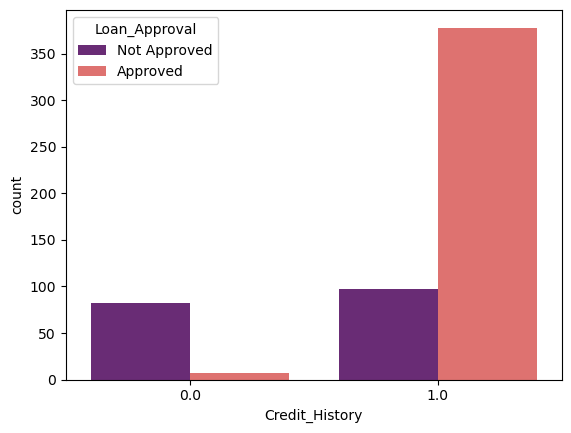

In [371]:
sns.countplot(x = df.Credit_History,hue = df.Loan_Approval,palette="magma")
plt.show()

In [373]:

df['Credit_History'] = df['Credit_History'].replace({'yes': 1, 'no': 0, 'unknown': None})
result = df.groupby("Loan_Approval")["Credit_History"].agg(["mean", "median", "sum"])
print(result)


                   mean  median    sum
Loan_Approval                         
Approved       0.981818     1.0  378.0
Not Approved   0.541899     1.0   97.0


In [375]:
approval_table = pd.crosstab(df["Credit_History"], df["Loan_Approval"])
approval_table

Loan_Approval,Approved,Not Approved
Credit_History,,
0.0,7,82
1.0,378,97


## Analyze the relationship between loan term (Loan_Amount_Term) and loan approval rate.

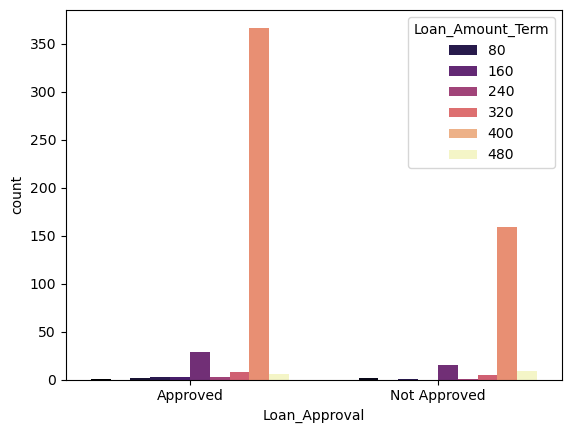

In [378]:
sns.countplot(x = df.Loan_Approval,hue= df.Loan_Amount_Term,palette="magma")
plt.show()

In [379]:

result = df.groupby("Loan_Approval")["Loan_Amount_Term"].agg(["mean", "median", "sum"])
print(result)

                    mean  median     sum
Loan_Approval                           
Approved       341.43128   360.0  144084
Not Approved   344.56250   360.0   66156


## Investigate the interaction between credit history and loan term.

In [386]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History       float64
Property_Area         object
Loan_Status           object
Loan_Approval         object
dtype: object

In [392]:
# Group by Credit_History and Loan_Amount_Term to see the interaction
interaction = df.groupby('Credit_History')['Loan_Amount_Term'].describe()

# Display the result
interaction


,count,mean,std,min,25%,50%,75%,max
Credit_History,,,,,,,,
0.0,89.0,343.146067,64.589535,180.0,360.0,360.0,360.0,480.0
1.0,475.0,342.492632,63.765272,36.0,360.0,360.0,360.0,480.0


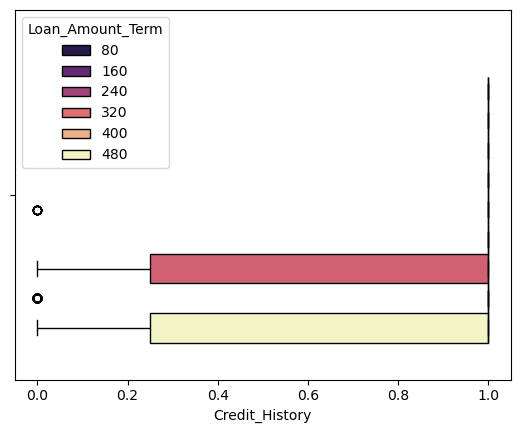

In [398]:
sns.boxplot(x='Credit_History', hue='Loan_Amount_Term', data=df, palette="magma")
plt.show()

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_16212\1908400894.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Credit_History', y='Loan_Amount_Term', data=df, palette="Set2")


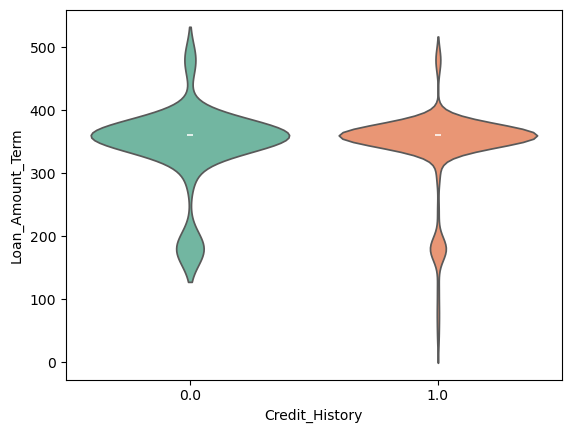

In [414]:
sns.violinplot(x='Credit_History', y='Loan_Amount_Term', data=df, palette="Set2")
plt.show()

## Task 6: Property Area and Loan Approval

## Analyze the distribution of loan approvals across different property areas (Urban, Semiurban, Rural)

In [444]:
# Group by 'Property_Area' and calculate the approval rate
approval_rate_by_area = df.groupby('Property_Area')['Loan_Approval'].describe()

# Display the results
print(approval_rate_by_area)


              count unique       top freq
Property_Area                            
Rural           179      2  Approved  110
Semiurban       233      2  Approved  179
Urban           202      2  Approved  133


In [449]:

approval_count = df[df['Loan_Approval'] == 'Approved'].groupby('Property_Area').size()

total_loans = df.groupby('Property_Area').size()

approval_rate_by_area = (approval_count / total_loans) * 100

print(approval_rate_by_area)


Property_Area
Rural        61.452514
Semiurban    76.824034
Urban        65.841584
dtype: float64


## Investigate if property area has a significant impact on loan amounts requested.

In [452]:
# Group by 'Property_Area' and calculate statistics for 'Loan_Amount'
loan_amount_by_area = df.groupby('Property_Area')['Loan_Amount_Term'].describe()

# Display the result
print(loan_amount_by_area)


               count        mean        std   min    25%    50%    75%    max
Property_Area                                                                
Rural          179.0  345.854749  53.848321  84.0  360.0  360.0  360.0  480.0
Semiurban      233.0  347.278970  60.129991  36.0  360.0  360.0  360.0  480.0
Urban          202.0  333.742574  76.190734  12.0  360.0  360.0  360.0  480.0
